1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


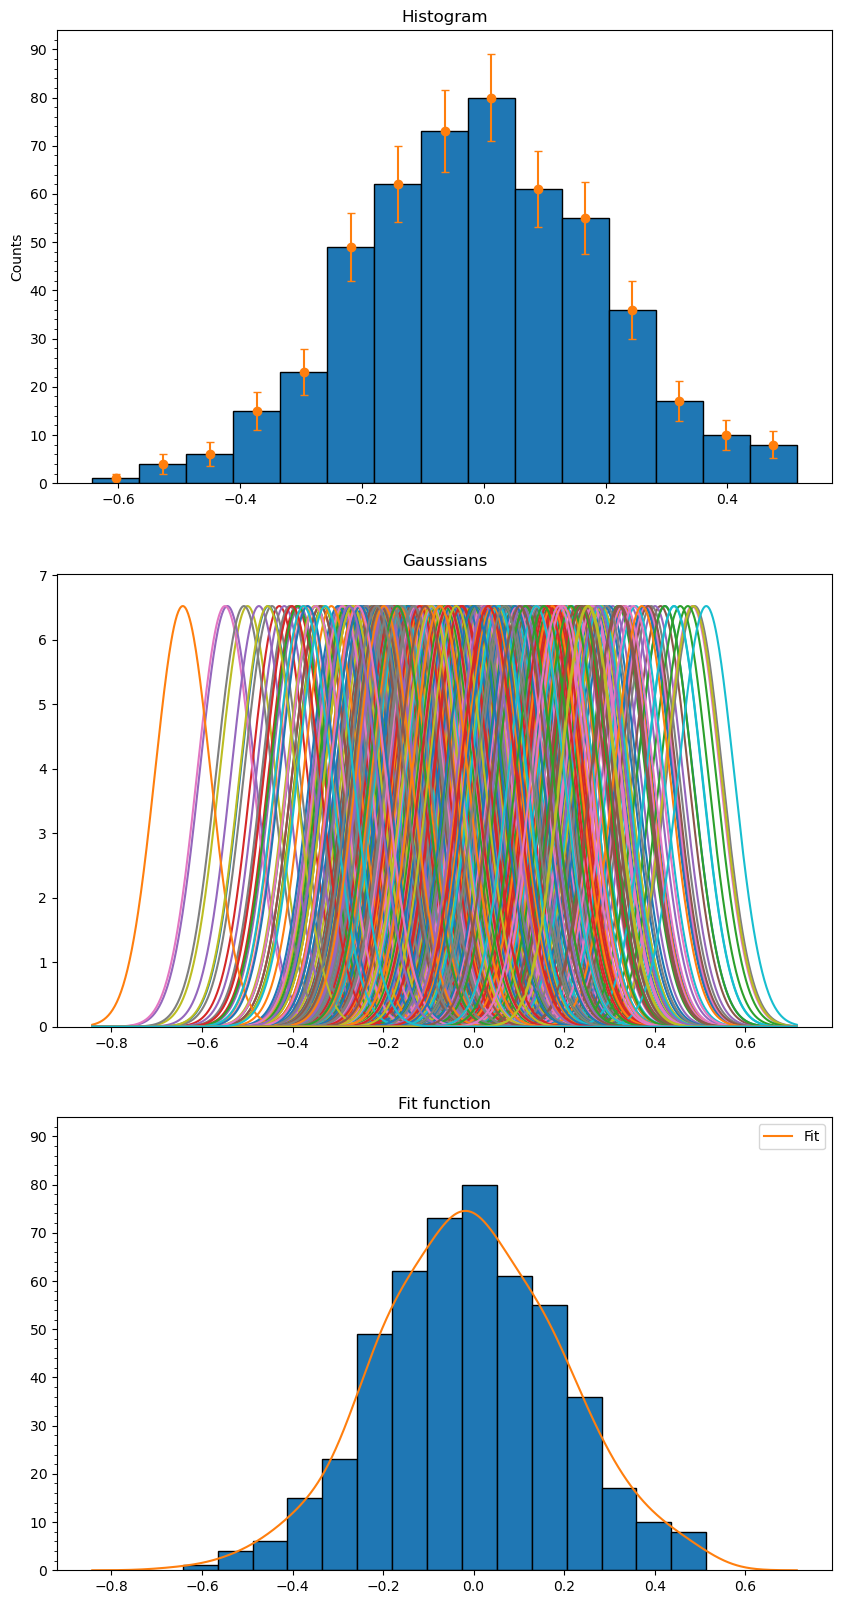

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as spt
import scipy
from matplotlib.ticker import AutoMinorLocator, MultipleLocator

N = 500
mean = 0
sigma = 0.2

x = np.random.normal(mean, sigma, N)

fig, (dati, gauss, fit) = plt.subplots(3, 1, figsize=(10, 20))

n, bins, k = dati.hist(x, bins=15, edgecolor='black')
dati.set_title('Histogram')
dati.set_ylabel('Counts')
dati.errorbar(0.5*(bins[:-1]+bins[1:]), n, yerr=np.sqrt(n), fmt='o', capsize=3)
dati.set_ylim([0, np.max(n)+ np.max(np.sqrt(n)+5)])
dati.yaxis.set_major_locator(MultipleLocator(10))
dati.yaxis.set_minor_locator(AutoMinorLocator(5))

std = 1.06*x.std()*pow(x.size, -1/5)
lsp = np.linspace(x.min()-sigma, x.max()+sigma, 1000)
gaussians = np.array([spt.norm.pdf(lsp, i, std) for i in x])
for func in gaussians:
    gauss.plot(lsp, func)
gauss.set_title('Gaussians')
gauss.set_ylim([0, np.max(gaussians[1,:])+0.5])

func_tot = np.sum(gaussians, axis=0)
integrale = scipy.integrate.trapz(func_tot, lsp)
A_histo = np.sum((bins[1:]-bins[:-1])*n)

fit.hist(x, bins=15, edgecolor='black')
fit.plot(lsp, func_tot*A_histo/integrale, label='Fit')
fit.set_ylim([0, np.max(n)+ np.max(np.sqrt(n)+5)])
fit.set_title('Fit function')
fit.legend()
fit.yaxis.set_major_locator(MultipleLocator(10))
fit.yaxis.set_minor_locator(AutoMinorLocator(5))

plt.show()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2023-02-03 16:30:49--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Risoluzione di www.dropbox.com (www.dropbox.com)... 162.125.69.18, 2620:100:6025:18::a27d:4512
Connessione a www.dropbox.com (www.dropbox.com)|162.125.69.18|:443... connesso.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [segue]
--2023-02-03 16:30:49--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Riutilizzo della connessione esistente a www.dropbox.com:443.
Richiesta HTTP inviata, in attesa di risposta... 302 Found
Posizione: https://uce51f6f225f3855ba28c0c4f0a6.dl.dropboxusercontent.com/cd/0/inline/B1z2xUpN2SinjH8t1Nr1pCb4dNpvRah_rcr_CDF0gOPZQiq2COio6eCqmG7_MGtOxI-rHpe3eJinvnpsULQd9QhhxxnuoVvyVerNApCjy1pkgw3QjK-0YPkK__IUGQPou-fJSXAo8etA9wR7rDlb_129IMnTgG0fWZShAEQfZW59pg/file# [segue]
--2023-02-03 16:30:50--  https://uce51f6f225f3855ba28c0c4f0a6.dl.dropboxusercontent.com/cd/0/i

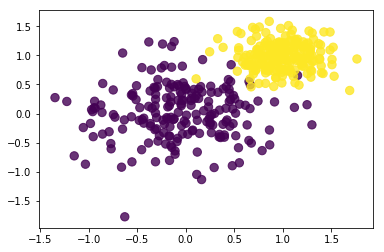

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

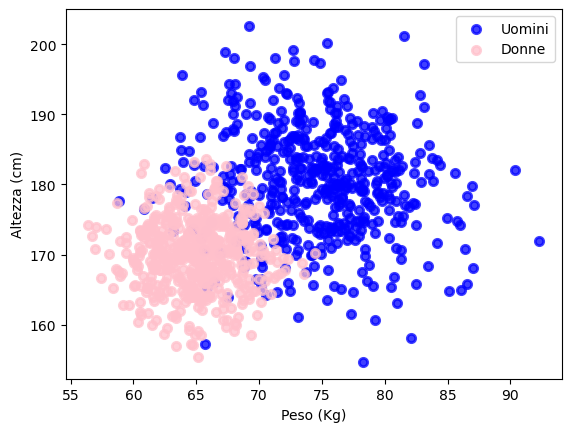

In [3]:
x1 = np.random.normal(75,5,500)
y1 = np.random.normal(180,8,500)

x2 = np.random.normal(65,3,500)
y2 = np.random.normal(170,5,500)

plt.scatter(x1, y1, c='blue', linewidths=2, alpha=0.75, label='Uomini')
plt.scatter(x2, y2, c='pink', linewidths=2, alpha=0.75, label='Donne')
plt.legend()
plt.xlabel('Peso (Kg)')
plt.ylabel('Altezza (cm)')


plt.show()


3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

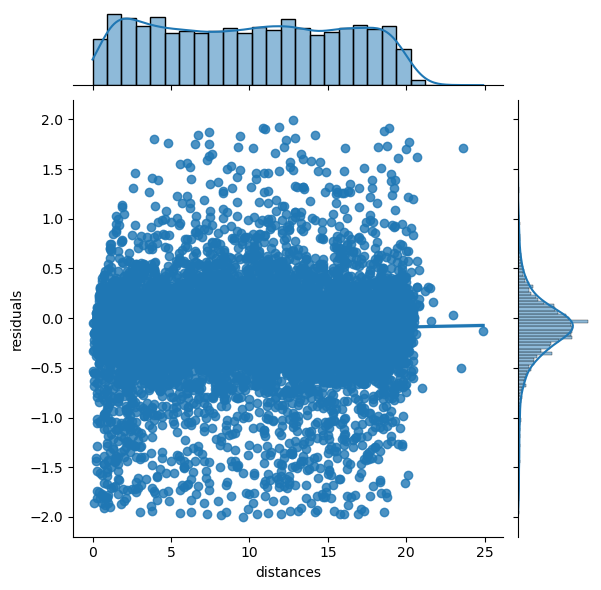

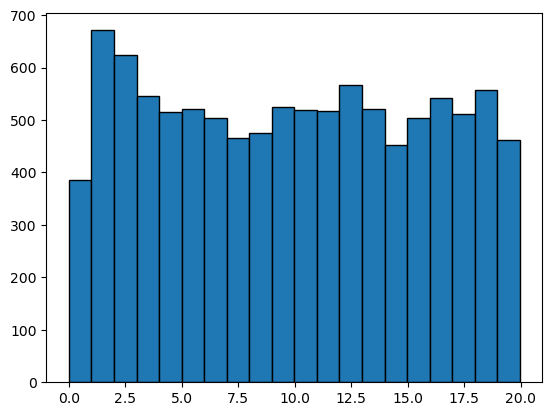

(1000,)


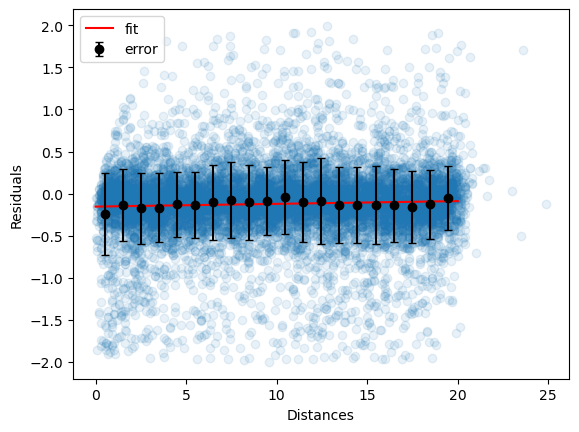

In [1]:
import numpy as np
import pandas as pd
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt

dati = pd.DataFrame(np.load('residuals_261.npy', allow_pickle=True).item())
# print(dati, '\n')

dati_fil = dati[np.abs(dati['residuals'])<2]
# print(dati_fil)

slope, inter, _, _, _ = sp.stats.linregress(dati_fil['distances'], dati_fil['residuals'])

sns.jointplot(data=dati_fil, x=dati_fil['distances'], y=dati_fil['residuals'], kind='reg')
plt.show()

n, bins, _ = plt.hist(dati_fil[dati_fil['distances']<20]['distances'], bins=20, edgecolor='black')
x = 0.5*(bins[:-1]+bins[1:])
y = np.array([np.mean(dati_fil[np.logical_and(dati_fil['distances']>bins[i],dati_fil['distances']<bins[i+1])]['residuals']) for i in range(bins.shape[0]-1)])
erry = np.array([np.std(dati_fil[np.logical_and(dati_fil['distances']>bins[i],dati_fil['distances']<bins[i+1])]['residuals']) for i in range(bins.shape[0]-1)])


plt.show()


lsp = np.linspace(0,20,1000)
fit = lsp*slope+inter
print(fit.shape)
plt.scatter(dati_fil['distances'], dati_fil['residuals'], alpha=0.1)
plt.plot(lsp, fit, color='red', label='fit')
plt.errorbar(x, y, erry, fmt='o', capsize=3, color='black', label='error')
plt.legend()
plt.xlabel('Distances')
plt.ylabel('Residuals')
plt.show()